In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
from statsmodels.stats.multitest import multipletests
# Global style
plt.rcParams['pdf.fonttype'] = 42  # Embed fonts
plt.rcParams['figure.dpi'] = 300
sns.set_style('whitegrid')

In [ ]:
vars=pd.read_table("/gchm/cd4_chrombpnet/chrombpnet_model_b7/variant_prediction_scores/averaged_scores/average_cd4_tcells_AJ_common_variants.mean.variant_scores.tsv", sep="\t")

In [6]:
vars.shape
vars = vars.drop_duplicates(
    subset='variant_id',        # or ['chr', 'pos', 'allele1', 'allele2']
    keep='first'
)
vars

,chr,pos,allele1,allele2,variant_id,logfc.mean,logfc.mean.pval,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,...,jsd_x_active_allele_quantile.mean,jsd_x_active_allele_quantile.mean.pval,logfc_x_jsd_x_active_allele_quantile.mean,logfc_x_jsd_x_active_allele_quantile.mean.pval,abs_logfc_x_jsd_x_active_allele_quantile.mean,abs_logfc_x_jsd_x_active_allele_quantile.mean.pval,quantile_change.mean,quantile_change.mean.pval,abs_quantile_change.mean,abs_quantile_change.mean.pval
0,chr10,76277,G,T,chr10_76277_G_T,0.009634,0.690529,0.010448,0.701979,0.009643,...,0.008039,0.236242,0.000077,0.451899,0.000082,0.461365,0.000832,0.815148,0.000889,0.826148
1,chr10,87333,G,C,chr10_87333_G_C,-0.099483,0.141843,0.099483,0.138541,0.022684,...,0.011498,0.153995,-0.001157,0.146009,0.001157,0.142901,-0.025349,0.104590,0.025349,0.102335
2,chr10,87401,C,T,chr10_87401_C_T,-0.158459,0.061892,0.158459,0.060506,0.019256,...,0.010553,0.174505,-0.001634,0.088043,0.001634,0.086038,-0.037536,0.047190,0.037536,0.046204
3,chr10,87928,G,A,chr10_87928_G_A,-0.013026,0.658503,0.013026,0.643226,0.009444,...,0.005991,0.311288,-0.000078,0.451115,0.000078,0.438545,-0.002723,0.605698,0.002723,0.591128
4,chr10,87983,T,C,chr10_87983_T_C,0.028804,0.406433,0.028804,0.418966,0.011855,...,0.007471,0.252976,0.000215,0.286498,0.000215,0.296159,0.006398,0.356296,0.006398,0.368665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160243,chr9,138022809,G,T,chr9_138022809_G_T,-0.028560,0.441615,0.028560,0.430371,0.018320,...,0.012104,0.151591,-0.000369,0.254762,0.000369,0.246013,-0.005559,0.421029,0.005559,0.410096
160244,chr9,138022939,G,C,chr9_138022939_G_C,-0.190585,0.043853,0.190585,0.042855,0.069419,...,0.051232,0.009270,-0.009880,0.017875,0.009880,0.017842,-0.029970,0.064083,0.029970,0.061996
160245,chr9,138127843,A,G,chr9_138127843_A_G,0.037835,0.333927,0.037835,0.344995,0.010230,...,0.005350,0.355487,0.000215,0.301376,0.000215,0.311877,0.009081,0.265017,0.009081,0.273010
160246,chr9,138128413,C,A,chr9_138128413_C_A,-0.278892,0.022199,0.278892,0.021916,0.064752,...,0.024364,0.050244,-0.007053,0.027173,0.007053,0.026587,-0.072153,0.013278,0.072153,0.013283


In [7]:
print(vars.columns)
vars.head(4)

Index(['chr', 'pos', 'allele1', 'allele2', 'variant_id', 'logfc.mean',
       'logfc.mean.pval', 'abs_logfc.mean', 'abs_logfc.mean.pval', 'jsd.mean',
       'jsd.mean.pval', 'logfc_x_jsd.mean', 'logfc_x_jsd.mean.pval',
       'abs_logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean.pval',
       'active_allele_quantile.mean', 'active_allele_quantile.mean.pval',
       'logfc_x_active_allele_quantile.mean',
       'logfc_x_active_allele_quantile.mean.pval',
       'abs_logfc_x_active_allele_quantile.mean',
       'abs_logfc_x_active_allele_quantile.mean.pval',
       'jsd_x_active_allele_quantile.mean',
       'jsd_x_active_allele_quantile.mean.pval',
       'logfc_x_jsd_x_active_allele_quantile.mean',
       'logfc_x_jsd_x_active_allele_quantile.mean.pval',
       'abs_logfc_x_jsd_x_active_allele_quantile.mean',
       'abs_logfc_x_jsd_x_active_allele_quantile.mean.pval',
       'quantile_change.mean', 'quantile_change.mean.pval',
       'abs_quantile_change.mean', 'abs_quantile_change.mean.pval'

,chr,pos,allele1,allele2,variant_id,logfc.mean,logfc.mean.pval,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,...,jsd_x_active_allele_quantile.mean,jsd_x_active_allele_quantile.mean.pval,logfc_x_jsd_x_active_allele_quantile.mean,logfc_x_jsd_x_active_allele_quantile.mean.pval,abs_logfc_x_jsd_x_active_allele_quantile.mean,abs_logfc_x_jsd_x_active_allele_quantile.mean.pval,quantile_change.mean,quantile_change.mean.pval,abs_quantile_change.mean,abs_quantile_change.mean.pval
0,chr10,76277,G,T,chr10_76277_G_T,0.009634,0.690529,0.010448,0.701979,0.009643,...,0.008039,0.236242,0.000077,0.451899,0.000082,0.461365,0.000832,0.815148,0.000889,0.826148
1,chr10,87333,G,C,chr10_87333_G_C,-0.099483,0.141843,0.099483,0.138541,0.022684,...,0.011498,0.153995,-0.001157,0.146009,0.001157,0.142901,-0.025349,0.104590,0.025349,0.102335
2,chr10,87401,C,T,chr10_87401_C_T,-0.158459,0.061892,0.158459,0.060506,0.019256,...,0.010553,0.174505,-0.001634,0.088043,0.001634,0.086038,-0.037536,0.047190,0.037536,0.046204
3,chr10,87928,G,A,chr10_87928_G_A,-0.013026,0.658503,0.013026,0.643226,0.009444,...,0.005991,0.311288,-0.000078,0.451115,0.000078,0.438545,-0.002723,0.605698,0.002723,0.591128


#### Outputs
- **log_counts_diff**: Total predicted coverage between the Ref and Alt alleles, providing a canonical effect size of the variant on local accessibility
- **log_probs_diff_abs_sum**: Sum of absolute difference in log probabilites per base between alternate allele and reference allele predictions
- **probs_jsd_diff**: Jensenshannon distance between alternate allele profile probability predictions and reference allele profile probability predictions, which captures the effect omn profile shape, such as changes in T footprints
- **Integrative effect size (IES):** Is the prodcut of the logFC and JSD, capturing both total coverage change and profile change shap differences
- **Integrative Prioritization Score (IPS)** is the product of logFC, JSD, and AAQ, integrating all aspects of variant impact to prioritize biologically relevant variants.

Saved plot to plots/volcano_plot.pdf


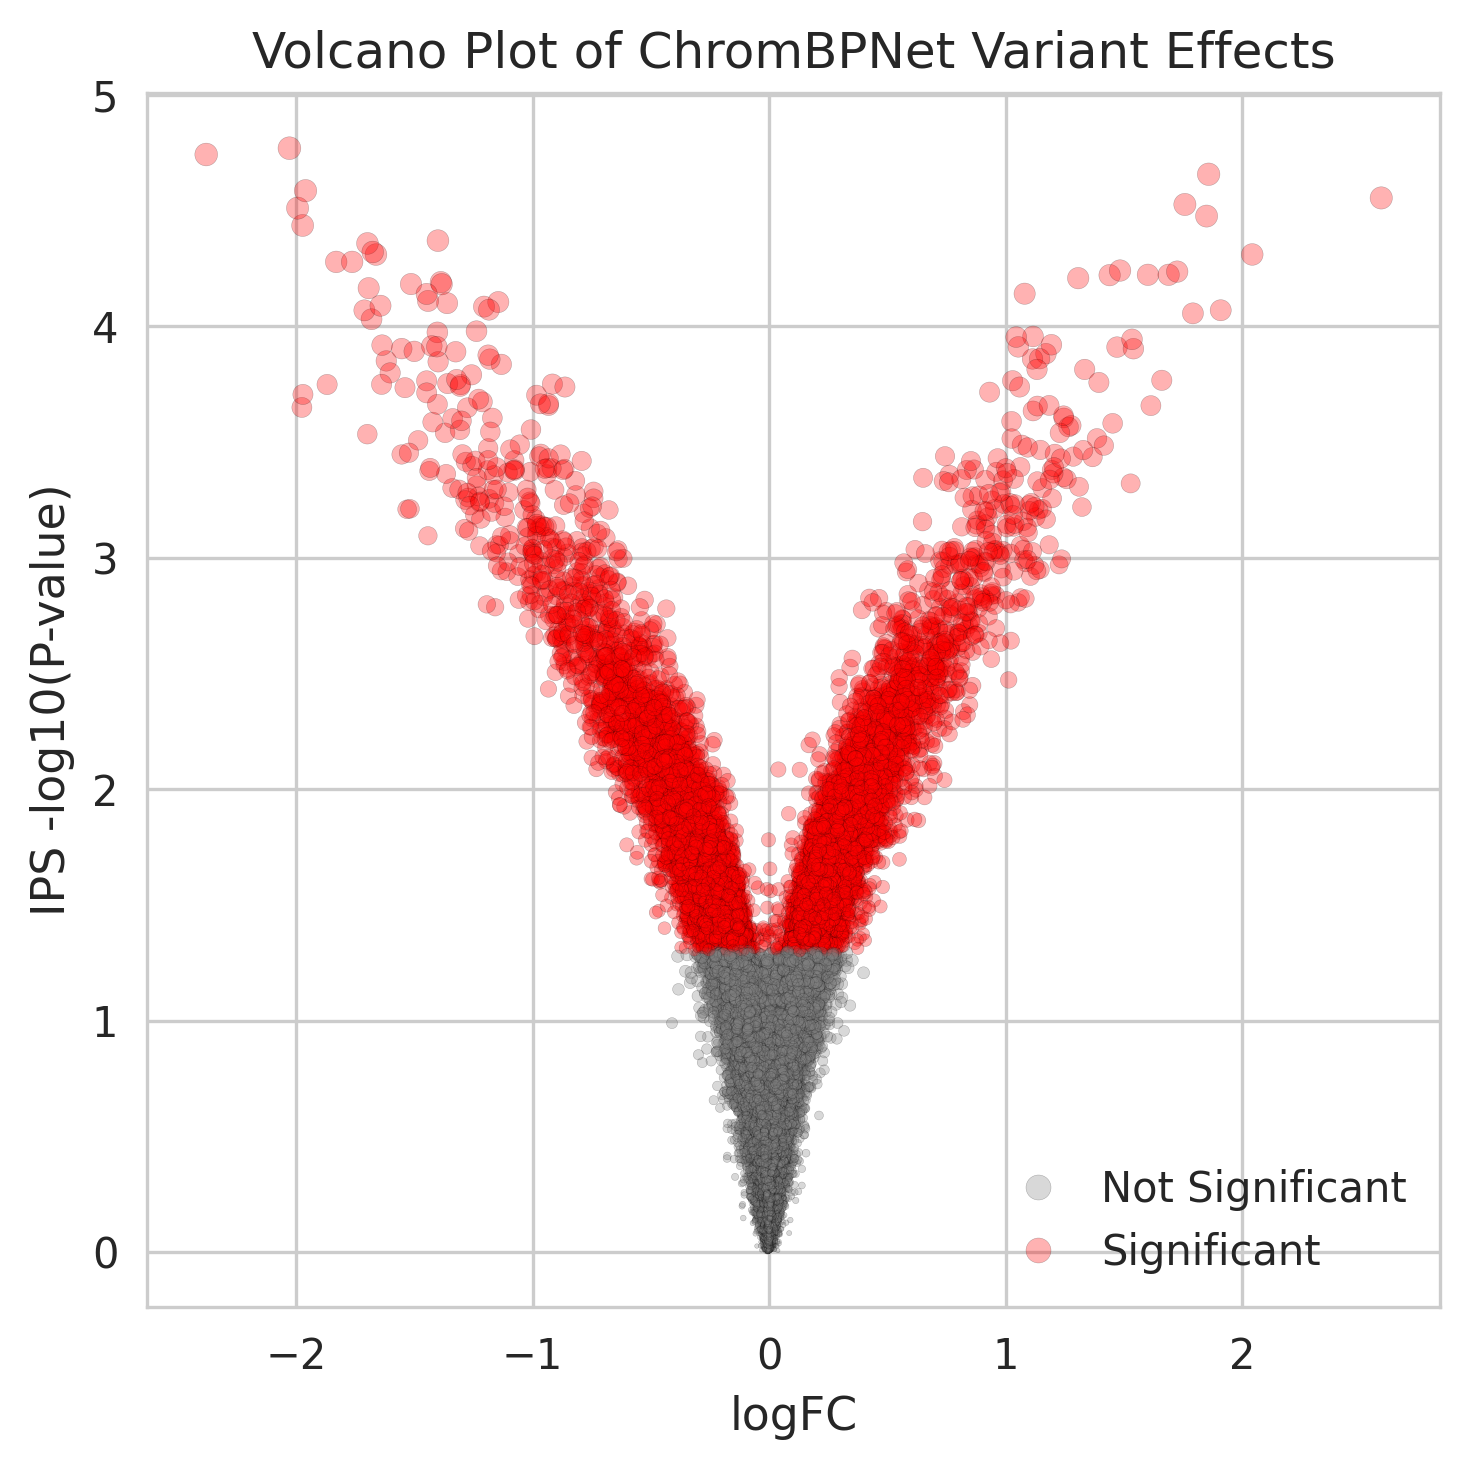

Number of significant variants: 11469 out of 160248 (7.16%)


In [25]:
def create_volcano_plot(vars_df, output_file=None, threshold_pval=0.05):
    df = vars_df.copy()
    df['-log10(pval)'] = -np.log10(df['logfc_x_jsd_x_active_allele_quantile.mean.pval'])
    df['significant'] = np.where(
        df['logfc_x_jsd_x_active_allele_quantile.mean.pval'] < threshold_pval,
        'Significant',
        'Not Significant'
    )

    palette = {'Significant': 'red', 'Not Significant': 'gray'}

    fig, ax = plt.subplots(figsize=(5, 5))
    scatter = sns.scatterplot(
        data=df,
        x='logfc.mean',
        y='-log10(pval)',
        hue='significant',
        size='-log10(pval)',
        sizes=(1, 30),
        palette=palette,
        edgecolor='black',
        alpha=0.3,
        rasterized=True,
        legend='brief',
        ax=ax
    )

    # Remove size legend by filtering legend entries
    handles, labels = ax.get_legend_handles_labels()
    filtered = [(h, l) for h, l in zip(handles, labels) if l in ['Significant', 'Not Significant']]
    if filtered:
        ax.legend(
            *zip(*filtered),
            title='',
            loc='lower right',
            frameon=False,
            handletextpad=0.5,
            borderpad=0.3
        )

    ax.set_xlabel('logFC', fontsize=11)
    ax.set_ylabel('IPS -log10(P-value)', fontsize=11)
    ax.set_title('Volcano Plot of ChromBPNet Variant Effects', fontsize=12)
    plt.tight_layout()

    if output_file:
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        print(f"Saved plot to {output_file}")
    plt.show()

    sig_df = df[df['significant'] == 'Significant']
    print(f"Number of significant variants: {len(sig_df)} out of {len(df)} ({len(sig_df)/len(df)*100:.2f}%)")
    return sig_df



    
# Create the volcano plot
significant_variants = create_volcano_plot(
    vars,  # Your pre-loaded DataFrame
    output_file='plots/volcano_plot.pdf',  # Optional: save to file
    threshold_pval=0.05  # Adjust as needed
)


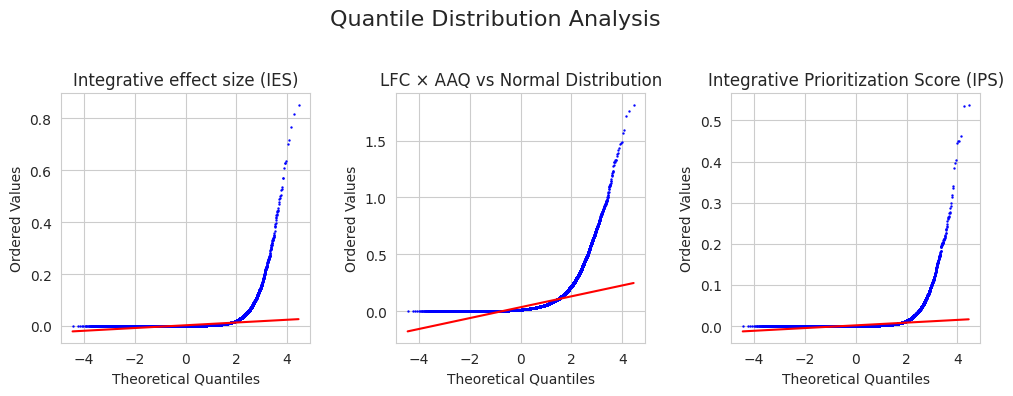

In [103]:
# Create a figure with subplots for different visualization types - just one row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Quantile Distribution Analysis', fontsize=16)

# For abs_logfc_x_jsd.mean
res1 = stats.probplot(vars['abs_logfc_x_jsd.mean'], dist="norm", plot=None)
# Rasterize the data points
scatter1 = axes[0].scatter(res1[0][0], res1[0][1], s=0.5, color='blue', rasterized=True)
# Keep the reference line as vector
line1 = axes[0].plot(res1[0][0], res1[1][0] * res1[0][0] + res1[1][1], 'r-', rasterized=False)
axes[0].set_title('Integrative effect size (IES)')
axes[0].set_xlabel('Theoretical Quantiles')
axes[0].set_ylabel('Ordered Values')

# For abs_logfc_x_active_allele_quantile.mean
res2 = stats.probplot(vars['abs_logfc_x_active_allele_quantile.mean'], dist="norm", plot=None)
# Rasterize the data points
scatter2 = axes[1].scatter(res2[0][0], res2[0][1], s=0.5, color='blue', rasterized=True)
# Keep the reference line as vector
line2 = axes[1].plot(res2[0][0], res2[1][0] * res2[0][0] + res2[1][1], 'r-', rasterized=False)
axes[1].set_title('LFC × AAQ vs Normal Distribution')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Ordered Values')

# For abs_logfc_x_jsd_x_active_allele_quantile.mean
res3 = stats.probplot(vars['abs_logfc_x_jsd_x_active_allele_quantile.mean'], dist="norm", plot=None)
# Rasterize the data points
scatter3 = axes[2].scatter(res3[0][0], res3[0][1], s=0.5, color='blue', rasterized=True)
# Keep the reference line as vector
line3 = axes[2].plot(res3[0][0], res3[1][0] * res3[0][0] + res3[1][1], 'r-', rasterized=False)
axes[2].set_title('Integrative Prioritization Score (IPS)')
axes[2].set_xlabel('Theoretical Quantiles')
axes[2].set_ylabel('Ordered Values')

# Set the figure DPI for rasterization
plt.rcParams['pdf.fonttype'] = 42  # Ensures fonts are embedded properly
plt.rcParams['figure.dpi'] = 300

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('plots/quantile_distribution_analysis.pdf', dpi=300, bbox_inches='tight')
plt.show()

### Save extreme variants in peaks
note: need to investigate why are there duplicate variants

In [26]:
# Convert pos to string (just to be safe)
# df has columns: variant_id, pval
sig=vars[(vars["abs_logfc.mean.pval"] < 0.01) & (vars["abs_quantile_change.mean"] > 0.05)]
sig

,chr,pos,allele1,allele2,variant_id,logfc.mean,logfc.mean.pval,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,...,logfc_x_jsd_x_active_allele_quantile.mean,logfc_x_jsd_x_active_allele_quantile.mean.pval,abs_logfc_x_jsd_x_active_allele_quantile.mean,abs_logfc_x_jsd_x_active_allele_quantile.mean.pval,quantile_change.mean,quantile_change.mean.pval,abs_quantile_change.mean,abs_quantile_change.mean.pval,logfc_x_jsd_x_active_allele_quantile.mean.qval,sig_fdr05
74,chr10,1036614,C,T,chr10_1036614_C_T,-0.399680,0.010233,0.399680,0.009948,0.054419,...,-0.013350,0.013515,0.013350,0.013123,-0.085155,0.009522,0.085155,0.009209,0.654023,False
93,chr10,1062604,T,G,chr10_1062604_T_G,0.416832,0.008995,0.416832,0.009411,0.048227,...,0.017226,0.010139,0.017226,0.010338,0.054183,0.024648,0.054183,0.025383,0.634282,False
108,chr10,1150019,T,C,chr10_1150019_T_C,1.086067,0.000330,1.086067,0.000366,0.078026,...,0.068903,0.001051,0.068903,0.001086,0.128714,0.003287,0.128714,0.003437,0.453609,False
121,chr10,1426001,C,T,chr10_1426001_C_T,-0.852599,0.001020,0.852599,0.000938,0.120838,...,-0.051861,0.001911,0.051861,0.001816,-0.216800,0.000684,0.216800,0.000571,0.516351,False
131,chr10,1809323,G,A,chr10_1809323_G_A,-0.741757,0.001685,0.741757,0.001587,0.147563,...,-0.097428,0.000517,0.097428,0.000487,-0.052773,0.025001,0.052773,0.024501,0.420597,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159916,chr9,136385182,C,T,chr9_136385182_C_T,-0.996644,0.000763,0.996644,0.000666,0.097152,...,-0.082048,0.001057,0.082048,0.000906,-0.117746,0.004159,0.117746,0.004348,0.453609,False
160010,chr9,136743089,T,C,chr9_136743089_T_C,-0.691251,0.002281,0.691251,0.002252,0.185750,...,-0.050563,0.002250,0.050563,0.002231,-0.177300,0.001294,0.177300,0.001306,0.522236,False
160012,chr9,136757628,C,G,chr9_136757628_C_G,-0.622395,0.003491,0.622395,0.003348,0.079437,...,-0.043495,0.003018,0.043495,0.002947,-0.059206,0.021077,0.059206,0.020740,0.541185,False
160033,chr9,136785265,A,C,chr9_136785265_A_C,0.915860,0.000765,0.915860,0.000883,0.112506,...,0.086053,0.000753,0.086053,0.000883,0.117799,0.004793,0.117799,0.004746,0.437388,False


In [27]:
sig2=vars[(vars["abs_logfc_x_jsd_x_active_allele_quantile.mean.pval"] < 0.01)]
sig2

,chr,pos,allele1,allele2,variant_id,logfc.mean,logfc.mean.pval,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,...,logfc_x_jsd_x_active_allele_quantile.mean,logfc_x_jsd_x_active_allele_quantile.mean.pval,abs_logfc_x_jsd_x_active_allele_quantile.mean,abs_logfc_x_jsd_x_active_allele_quantile.mean.pval,quantile_change.mean,quantile_change.mean.pval,abs_quantile_change.mean,abs_quantile_change.mean.pval,logfc_x_jsd_x_active_allele_quantile.mean.qval,sig_fdr05
97,chr10,1074944,C,T,chr10_1074944_C_T,0.470006,0.006881,0.470006,0.007178,0.061529,...,0.026329,0.005378,0.026329,0.005586,0.030038,0.065235,0.030038,0.066991,0.581143,False
108,chr10,1150019,T,C,chr10_1150019_T_C,1.086067,0.000330,1.086067,0.000366,0.078026,...,0.068903,0.001051,0.068903,0.001086,0.128714,0.003287,0.128714,0.003437,0.453609,False
121,chr10,1426001,C,T,chr10_1426001_C_T,-0.852599,0.001020,0.852599,0.000938,0.120838,...,-0.051861,0.001911,0.051861,0.001816,-0.216800,0.000684,0.216800,0.000571,0.516351,False
126,chr10,1662546,A,G,chr10_1662546_A_G,0.510420,0.005282,0.510420,0.005498,0.045525,...,0.021660,0.007361,0.021660,0.007516,0.036920,0.046956,0.036920,0.048289,0.606220,False
131,chr10,1809323,G,A,chr10_1809323_G_A,-0.741757,0.001685,0.741757,0.001587,0.147563,...,-0.097428,0.000517,0.097428,0.000487,-0.052773,0.025001,0.052773,0.024501,0.420597,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160010,chr9,136743089,T,C,chr9_136743089_T_C,-0.691251,0.002281,0.691251,0.002252,0.185750,...,-0.050563,0.002250,0.050563,0.002231,-0.177300,0.001294,0.177300,0.001306,0.522236,False
160012,chr9,136757628,C,G,chr9_136757628_C_G,-0.622395,0.003491,0.622395,0.003348,0.079437,...,-0.043495,0.003018,0.043495,0.002947,-0.059206,0.021077,0.059206,0.020740,0.541185,False
160033,chr9,136785265,A,C,chr9_136785265_A_C,0.915860,0.000765,0.915860,0.000883,0.112506,...,0.086053,0.000753,0.086053,0.000883,0.117799,0.004793,0.117799,0.004746,0.437388,False
160111,chr9,137108049,T,C,chr9_137108049_T_C,-0.721103,0.002145,0.721103,0.002007,0.136372,...,-0.052431,0.002288,0.052431,0.002112,-0.184301,0.001132,0.184301,0.001234,0.522236,False


In [42]:
sig3=vars[(vars["abs_logfc_x_jsd_x_active_allele_quantile.mean.pval"] < 0.05)]
sig3

,chr,pos,allele1,allele2,variant_id,logfc.mean,logfc.mean.pval,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,...,logfc_x_jsd_x_active_allele_quantile.mean,logfc_x_jsd_x_active_allele_quantile.mean.pval,abs_logfc_x_jsd_x_active_allele_quantile.mean,abs_logfc_x_jsd_x_active_allele_quantile.mean.pval,quantile_change.mean,quantile_change.mean.pval,abs_quantile_change.mean,abs_quantile_change.mean.pval,logfc_x_jsd_x_active_allele_quantile.mean.qval,sig_fdr05
15,chr10,324183,C,T,chr10_324183_C_T,-0.334654,0.014888,0.334654,0.014396,0.046628,...,-0.012731,0.013031,0.012731,0.012876,-0.036777,0.046747,0.036777,0.045568,0.651145,False
18,chr10,333556,T,C,chr10_333556_T_C,-0.168858,0.058688,0.168858,0.056835,0.050795,...,-0.006730,0.030417,0.006730,0.029577,-0.026783,0.077351,0.026783,0.075454,0.680553,False
21,chr10,382150,C,G,chr10_382150_C_G,0.214994,0.038312,0.214994,0.039588,0.041092,...,0.007906,0.024414,0.007906,0.024831,0.017838,0.136891,0.017838,0.140812,0.678821,False
73,chr10,1036573,T,A,chr10_1036573_T_A,0.238052,0.029303,0.238052,0.029993,0.038354,...,0.006140,0.029513,0.006140,0.030074,0.044561,0.032446,0.044561,0.033095,0.679182,False
74,chr10,1036614,C,T,chr10_1036614_C_T,-0.399680,0.010233,0.399680,0.009948,0.054419,...,-0.013350,0.013515,0.013350,0.013123,-0.085155,0.009522,0.085155,0.009209,0.654023,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160222,chr9,137788324,G,C,chr9_137788324_G_C,0.271569,0.022599,0.271569,0.022959,0.058298,...,0.009884,0.018219,0.009884,0.018331,0.059531,0.018762,0.059531,0.019035,0.668059,False
160223,chr9,137788389,C,T,chr9_137788389_C_T,-0.310117,0.017404,0.310117,0.017427,0.056952,...,-0.010429,0.017744,0.010429,0.017846,-0.072838,0.012806,0.072838,0.012959,0.666874,False
160233,chr9,137800420,C,T,chr9_137800420_C_T,-0.256989,0.025502,0.256989,0.025180,0.050291,...,-0.007147,0.025571,0.007147,0.025351,-0.060209,0.018704,0.060209,0.018464,0.678821,False
160244,chr9,138022939,G,C,chr9_138022939_G_C,-0.190585,0.043853,0.190585,0.042855,0.069419,...,-0.009880,0.017875,0.009880,0.017842,-0.029970,0.064083,0.029970,0.061996,0.666897,False


In [10]:
sig4=vars[(vars["logfc_x_jsd_x_active_allele_quantile.mean.pval"] < 0.05)]
sig4.to_csv('/gpfs/commons/home/mmatos/cd4_chrombpnet/chrombpnet_model_b7/variant_prediction_scores/averaged_scores/average_cd4_tcells_AJ_common_variants.mean.variant_scores_IPS05.tsv', sep='\t', index=False)


In [9]:
vars["sig_vars_IPS_p0.05"]=(vars['logfc_x_jsd_x_active_allele_quantile.mean.pval'] < 0.05)
vars.to_csv('/gpfs/commons/home/mmatos/cd4_chrombpnet/chrombpnet_model_b7/variant_prediction_scores/averaged_scores/average_cd4_tcells_AJ_common_variants.mean.variant_scores_significan.tsv', sep='\t', index=False)
vars

,chr,pos,allele1,allele2,variant_id,logfc.mean,logfc.mean.pval,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,...,jsd_x_active_allele_quantile.mean.pval,logfc_x_jsd_x_active_allele_quantile.mean,logfc_x_jsd_x_active_allele_quantile.mean.pval,abs_logfc_x_jsd_x_active_allele_quantile.mean,abs_logfc_x_jsd_x_active_allele_quantile.mean.pval,quantile_change.mean,quantile_change.mean.pval,abs_quantile_change.mean,abs_quantile_change.mean.pval,sig_vars_IPS_p0.05
0,chr10,76277,G,T,chr10_76277_G_T,0.009634,0.690529,0.010448,0.701979,0.009643,...,0.236242,0.000077,0.451899,0.000082,0.461365,0.000832,0.815148,0.000889,0.826148,False
1,chr10,87333,G,C,chr10_87333_G_C,-0.099483,0.141843,0.099483,0.138541,0.022684,...,0.153995,-0.001157,0.146009,0.001157,0.142901,-0.025349,0.104590,0.025349,0.102335,False
2,chr10,87401,C,T,chr10_87401_C_T,-0.158459,0.061892,0.158459,0.060506,0.019256,...,0.174505,-0.001634,0.088043,0.001634,0.086038,-0.037536,0.047190,0.037536,0.046204,False
3,chr10,87928,G,A,chr10_87928_G_A,-0.013026,0.658503,0.013026,0.643226,0.009444,...,0.311288,-0.000078,0.451115,0.000078,0.438545,-0.002723,0.605698,0.002723,0.591128,False
4,chr10,87983,T,C,chr10_87983_T_C,0.028804,0.406433,0.028804,0.418966,0.011855,...,0.252976,0.000215,0.286498,0.000215,0.296159,0.006398,0.356296,0.006398,0.368665,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160243,chr9,138022809,G,T,chr9_138022809_G_T,-0.028560,0.441615,0.028560,0.430371,0.018320,...,0.151591,-0.000369,0.254762,0.000369,0.246013,-0.005559,0.421029,0.005559,0.410096,False
160244,chr9,138022939,G,C,chr9_138022939_G_C,-0.190585,0.043853,0.190585,0.042855,0.069419,...,0.009270,-0.009880,0.017875,0.009880,0.017842,-0.029970,0.064083,0.029970,0.061996,True
160245,chr9,138127843,A,G,chr9_138127843_A_G,0.037835,0.333927,0.037835,0.344995,0.010230,...,0.355487,0.000215,0.301376,0.000215,0.311877,0.009081,0.265017,0.009081,0.273010,False
160246,chr9,138128413,C,A,chr9_138128413_C_A,-0.278892,0.022199,0.278892,0.021916,0.064752,...,0.050244,-0.007053,0.027173,0.007053,0.026587,-0.072153,0.013278,0.072153,0.013283,True


In [ ]:
common_outliers_subset = vars[(vars['logfc_x_jsd_x_active_allele_quantile.mean.pval'] < 0.05)]
common_outliers_subset = common_outliers_subset[['chr','pos', 'allele1', 'allele2', 'variant_id']]

# Ensure position is string type if needed
if common_outliers_subset['pos'].dtype != 'object':
    common_outliers_subset['pos'] = common_outliers_subset['pos'].astype(str)

# Sort by chromosome and position
# Note: For natural sorting of positions, you might want a custom sorting function
common_outliers_subset = common_outliers_subset.sort_values(by=['chr', 'pos'])

# keep only the first occurrence of each variant_id  ── change subset=… if you prefer
common_outliers_subset = common_outliers_subset.drop_duplicates(
    subset='variant_id',        # or ['chr', 'pos', 'allele1', 'allele2']
    keep='first'
)
# Save to TSV
common_outliers_subset.to_csv('/gpfs/commons/home/mmatos/cd4_chrombpnet/chrombpnet_model_b7/variant_prediction_scores/averaged_scores/cd4_top_cpbnet_variants.tsv', sep='\t', index=False)
common_outliers_subset.to_csv('/gpfs/commons/home/mmatos/cd4_chrombpnet/chrombpnet_model_b7/variant_prediction_scores/averaged_scores/cd4_top_cpbnet_variants_noheader.tsv', sep='\t', index=False, header=None )

print("Saved subset of common outliers to 'cd4_top_cpbnet_variants.tsv'")

In [8]:
vars=pd.read_table("/gpfs/commons/home/mmatos/cd4_chrombpnet/chrombpnet_model_b7/variant_prediction_scores/averaged_scores/cd4_top_cpbnet_variants.tsv", sep="\t")

In [9]:
vars

,chr,pos,allele1,allele2,variant_id
0,chr1,1000112,G,T,chr1_1000112_G_T
1,chr1,100038008,T,C,chr1_100038008_T_C
2,chr1,100265744,G,C,chr1_100265744_G_C
3,chr1,100266264,G,A,chr1_100266264_G_A
4,chr1,100352908,T,C,chr1_100352908_T_C
...,...,...,...,...,...
11435,chr9,98216094,C,T,chr9_98216094_C_T
11436,chr9,98248847,T,G,chr9_98248847_T_G
11437,chr9,99013087,G,A,chr9_99013087_G_A
11438,chr9,99013843,G,A,chr9_99013843_G_A


In [ ]:
##### Convert to BED format
bed_vars = pd.DataFrame({
    'chrom': vars['chr'],
    'start': vars['pos'] - 1,         # BED format uses 0-based start
    'end': vars['pos'],               # end is non-inclusive
    'name': vars['variant_id']
})
bed_vars

# Save to BED file (tab-separated, no header, no index)
bed_vars.to_csv("/gpfs/commons/home/mmatos/cd4_chrombpnet/chrombpnet_model_b7/variant_prediction_scores/averaged_scores/cd4_top_cpbnet_variants_noheader.bed", sep="\t", header=False, index=False)

In [28]:
print(common_outliers_subset.head())
print(common_outliers_subset.shape)

        chr        pos allele1 allele2          variant_id
62627  chr1    1000112       G       T    chr1_1000112_G_T
69292  chr1  100038008       T       C  chr1_100038008_T_C
69312  chr1  100265744       G       C  chr1_100265744_G_C
69313  chr1  100266264       G       A  chr1_100266264_G_A
69321  chr1  100352908       T       C  chr1_100352908_T_C
(11440, 5)


#### checking that the contributions were stored properly

In [3]:
import deepdish as dd
import numpy as np

# Read the entire file
h5_file_path="/gpfs/commons/home/mmatos/cd4_chrombpnet/chrombpnet_model_b7/variant_contribution_scores/perfold/fold_0/cd4_tcells_AJ_common_variants.shap.variant_shap.counts.h5"
data = dd.io.load(h5_file_path)

# Access variant_ids
variant_ids = data['variant_ids']
print(f"variant_ids shape: {variant_ids.shape}")
print(f"variant_ids dtype: {variant_ids.dtype}")

# Print first 20 variant IDs
print("\nFirst 20 variant IDs:")
for i in range(min(20, len(variant_ids))):
    print(f"[{i}] {variant_ids[i]}")

variant_ids shape: (22880,)
variant_ids dtype: object

First 20 variant IDs:
[0] chr1_1000112_G_T
[1] chr1_100038008_T_C
[2] chr1_100265744_G_C
[3] chr1_100266264_G_A
[4] chr1_100352908_T_C
[5] chr1_100378201_C_A
[6] chr1_100394436_A_T
[7] chr1_100394464_G_A
[8] chr1_100397315_T_C
[9] chr1_100459670_T_G
[10] chr1_100500317_A_G
[11] chr1_100713250_C_T
[12] chr1_100895128_G_C
[13] chr1_100895622_C_T
[14] chr1_100896815_C_A
[15] chr1_100941963_A_G
[16] chr1_101066686_A_G
[17] chr1_101179359_A_G
[18] chr1_101179371_A_G
[19] chr1_101236283_C_T


In [2]:
# Read the entire file
h5_file_path="/gpfs/commons/home/mmatos/cd4_chrombpnet/chrombpnet_model_b7/variant_contribution_scores/averaged_cd4_tcells_AJ_common_variants.shap.counts.h5"
data = dd.io.load(h5_file_path)

# Access variant_ids
variant_ids = data['variant_ids']
print(f"variant_ids shape: {variant_ids.shape}")
print(f"variant_ids dtype: {variant_ids.dtype}")

# Print first 20 variant IDs
print("\nFirst 20 variant IDs:")
for i in range(min(20, len(variant_ids))):
    print(f"[{i}] {variant_ids[i]}")


NameError: name 'dd' is not defined

In [20]:
data

{'alleles': array([0., 0., 0., ..., 1., 1., 1.]),
 'projected_shap': {'seq': array([[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ...,